In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
sns.set(color_codes=True)

In [3]:
df = pd.read_csv (r'C:\Users\macdo\OneDrive\Desktop\TestingFit\DataOrgClean\Data3.csv')
df2 = pd.read_csv (r'C:\Users\macdo\OneDrive\Desktop\TestingFit\DataOrgClean\Residuals1.csv')
df

,State,beta,psi,alpha,xi,k,A,I0,ag,sq0,...,TrueDeaths,DaysAfter,PeakCase,IFR,CRC,ReportRatio,TimePeak,JuneJuly,MayEndDC,asc
0,Alabama,5.905155,1919.775705,0.142707,0.004864,0.202744,2967.092397,353.475155,6.068248,73547.775000,...,0.017236,52,0.040349,0.006232,0.330196,8.376000,110,1.422973,0.041909,0.119389
1,Alaska,5.567709,6000.000000,0.023924,0.001883,0.323170,675.466667,353.487786,11.996000,10973.175000,...,0.001270,51,0.048321,0.002047,0.060265,10.289228,51,0.438251,0.002564,0.097189
2,Arizona,1.963615,1968.320302,0.142857,0.009979,0.292904,6630.704307,1.167269,12.000000,36393.585079,...,0.018003,5,0.023223,0.013034,0.256577,5.383431,130,2.118121,0.023682,0.185755
3,Arkansas,1.048051,1.001608,0.023013,0.002445,0.188225,1622.933333,800.000000,5.341929,45267.060000,...,0.006498,50,0.033298,0.003156,0.227858,9.037113,130,1.168333,0.033298,0.110655
4,California,2.197666,1254.926682,0.059382,0.009286,0.405507,68667.800000,1.000000,1.712245,197561.115000,...,0.014224,4,0.020080,0.011722,0.264137,4.593995,87,0.984908,0.016711,0.217675
5,Colorado,1.762396,129.001986,0.012601,0.005413,0.168523,4151.896115,798.158626,2.472224,28793.843493,...,0.029164,44,0.089037,0.006396,0.437431,10.424344,87,0.357440,0.029830,0.095929
6,Connecticut,2.304086,82.487273,0.010642,0.012581,0.285414,4361.066667,411.552894,3.178652,17826.435000,...,0.121810,47,0.207919,0.014710,1.148841,7.207984,83,0.213419,0.033512,0.138735
7,Delaware,1.776326,62.076930,0.005000,0.004980,0.239860,1001.000000,181.313403,2.473450,4868.820000,...,0.044988,50,0.166005,0.005859,0.961868,7.982924,95,0.543253,0.055619,0.125267
8,District of Columbia,1.676340,55.088379,0.005118,0.007643,0.259932,785.934899,192.346566,12.000000,3528.798075,...,0.076395,46,0.166711,0.009127,1.172775,7.137059,91,0.471131,0.054871,0.140114
9,Florida,4.459373,795.015269,0.032113,0.006403,0.259770,15940.804373,1.000014,3.053548,142690.325188,...,0.014376,40,0.040224,0.008026,0.261680,6.844919,74,1.928616,0.020410,0.146094


In [3]:
#df = df.drop(1)
df4 = df2[["State","Baseline","Change1","Change2"]]


C:\Users\macdo\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(25.0, 0.5, 'cum. Ascertainment Ratio')

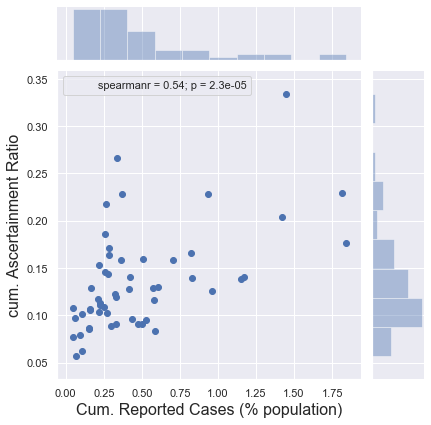

In [5]:
h = sns.jointplot(data=df, x="CRC", y="asc",stat_func=stats.spearmanr)
#plt.ylim([0,1.05*max(df["xi"])])
h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.ax_joint.set_xlabel('Cum. Reported Cases (% population)')
h.ax_joint.set_ylabel('cum. Ascertainment Ratio')


In [6]:

xdata = df["psi"]
ydata = df["TrueCases"]
xdata = xdata.to_numpy()
ydata = ydata.to_numpy()
popt, pcov = curve_fit(func, xdata, ydata,bounds=(0, np.inf))
m = min(xdata)
M = max(xdata)
xs = np.linspace(m,M)
plt.scatter(xdata,ydata)
plt.plot(xs,func(xs,*popt),'r')
plt.show()

NameError: name 'func' is not defined

In [ ]:
StatePops = [4903185, 731545, 7278717, 3017804, 39512223, 5758736, 3565287, 973764, 705749, 21477737, 10617423, 165768, 1415872, 1787065, 12671821, 6732219, 3155070, 2913314, 4467673,4648794, 1344212, 6045680, 6892503, 9986857, 5639632, 2976149, 6137428, 1068778, 1934408,3080156, 1359711, 8882190, 2096829, 19453561, 10488084, 762062,56882, 11689100, 3956971,4217737,12801989,3193694,1059361, 5148714, 884659, 6829174, 28995881, 3205958, 623989,106977,8535519, 7614893,1792147,5822434, 578759]

In [30]:
df2 = df[df['psi'] > 50] 
xdata = df2["psi"]
ydata = df2["TrueCases"]
zdata = df2["alpha"]
xdata = xdata.to_numpy()
ydata = ydata.to_numpy()
#xdata = (1-zdata)*xdata
zdata = zdata.to_numpy()
def func(x, a):
    return ((max(ydata)*(1+63.4)*1)/(1+x))

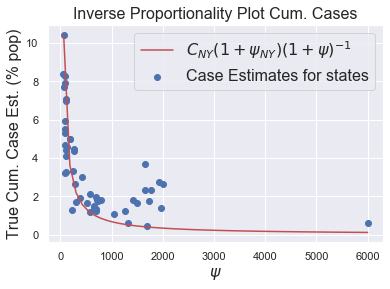

In [32]:
popt, pcov = curve_fit(func, xdata, ydata,bounds=(0, 1))
m = 63.4
M = max(xdata)
xs = np.linspace(m,M)
plt.scatter(xdata,ydata)
plt.plot(xs,func(xs,*popt),'r')
plt.xlabel('$\psi$',fontsize=16)
plt.ylabel('True Cum. Case Est. (% pop)',fontsize=16)
plt.title('Inverse Proportionality Plot Cum. Cases',fontsize=16)
plt.legend(['$C_{NY}(1+\psi_{NY})(1+\psi)^{-1}$','Case Estimates for states'],fontsize=16)
plt.show()

In [33]:
df2 = df[df['psi'] > 50] 
xdata = df2["psi"]
ydata = df2["PeakCase"]
zdata = df2["alpha"]
xdata = xdata.to_numpy()
ydata = ydata.to_numpy()
#xdata = (1-zdata)*xdata
zdata = zdata.to_numpy()
def func(x, a):
    return ((max(ydata)*(1+63.4)*a)/(1+x))

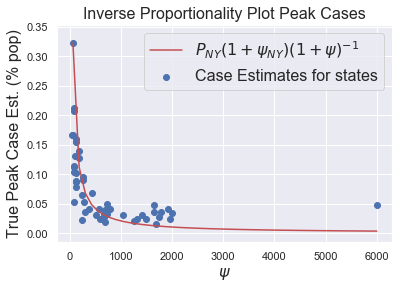

In [36]:
def func(x, a):
    return ((max(ydata)*(1+63.4))/(1+x))
popt, pcov = curve_fit(func, xdata, ydata,bounds=(0, 1))
m = 63.4
M = max(xdata)
xs = np.linspace(m,M)
plt.scatter(xdata,ydata)
plt.plot(xs,func(xs,*popt),'r')
plt.xlabel('$\psi$',fontsize=16)
plt.ylabel('True Peak Case Est. (% pop)',fontsize=16)
plt.title('Inverse Proportionality Plot Peak Cases',fontsize=16)
plt.legend(['$P_{NY}(1+\psi_{NY})(1+\psi)^{-1}$','Case Estimates for states'],fontsize=16)
plt.show()

In [16]:
popt

array([0.64030161])

In [27]:
import sys 

stdoutOrigin=sys.stdout 
sys.stdout = open("log.txt", "w")
print(df4.to_latex(index=False)) 

In [ ]:
np.size(Pops)

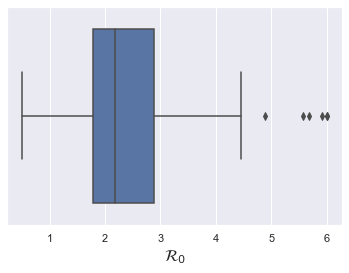

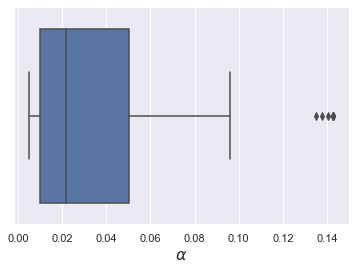

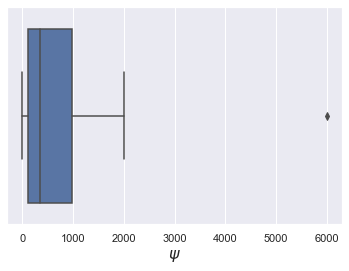

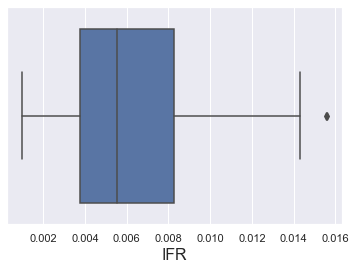

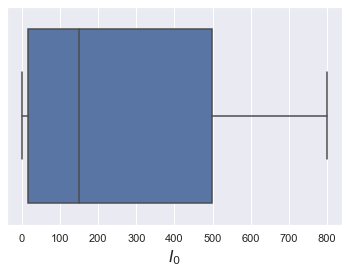

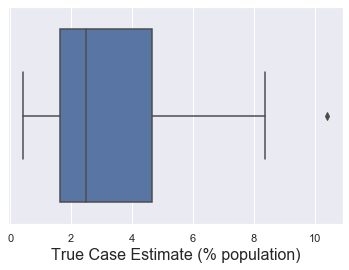

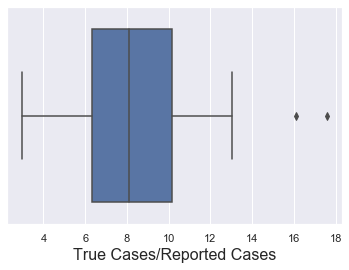

In [51]:
sns.boxplot(x=df["beta"])
plt.xlabel('$\mathcal{R}_0$',fontsize=16)
plt.show()
sns.boxplot(x=df["alpha"])
plt.xlabel(r'$\alpha$',fontsize=16)
plt.show()
sns.boxplot(x=df["psi"])
plt.xlabel(r'$\psi$',fontsize=16)
plt.show()
sns.boxplot(x=df["xi"])
plt.xlabel(r'IFR',fontsize=16)
plt.show()
sns.boxplot(x=df["I0"])
plt.xlabel(r'$I_0$',fontsize=16)
plt.show()
sns.boxplot(x=df["TrueCases"])
plt.xlabel(r'True Case Estimate (% population)',fontsize=16)
plt.show()
sns.boxplot(x=df["ReportRatio"])
plt.xlabel(r'True Cases/Reported Cases',fontsize=16)
plt.show()